In [2]:
import pickle
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
with open("/content/drive/Shareddrives/인빅_프로젝트/FC주문/FC_order_distance.pickle","rb") as fr:
    df = pickle.load(fr).reset_index(drop=True)

In [139]:
data = pd.DataFrame(df[['BKG_DATE', 'BKG_TIME','INV_AMT','ITEM_CD','ITEM_QTY',
       'ITEM_AMT', 'INS_TIME']])
       
data.head()

,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,INS_TIME
0,20210303,35521,20900.0,4610261043_2,1,20900.0,131425
1,20210303,35513,37900.0,4936599538_1,1,37900.0,131425
2,20210303,35608,69800.0,3858391637_1,1,69800.0,131425
3,20210303,35551,73700.0,4631307460,1,39800.0,131425
4,20210303,35551,73700.0,2475138283,1,15900.0,131425


In [140]:
#data['BKG_DATE'] = data.BKG_DATE.apply(lambda x: dt.datetime.strptime(str(x),"%Y%m%d").date())

#data["YEAR"] = data.BKG_DATE.apply(lambda x: x.year)
#data["Month"] = data.BKG_DATE.apply(lambda x: x.month)
#data["Day"] = data.BKG_DATE.apply(lambda x: x.day)
data['BKG_DATE'] = data.BKG_DATE.apply(lambda x: str(x))

data["초"] = data.BKG_TIME.apply(lambda x : str(x)[-2:])
data["초"] = data.초.apply(lambda x : str(0)*2 if x == '' else x)
data["초"] = data.초.apply(lambda x : str(0) + x if len(x)==1 else x)

data["분"] = data.BKG_TIME.apply(lambda x : str(x)[-4:-2])
data["분"] = data.분.apply(lambda x : str(0)*2 if x == '' else x)
data["분"] = data.분.apply(lambda x : str(0) + x if len(x)==1 else x)

data["시"] = data.BKG_TIME.apply(lambda x : str(x)[:-4])
data["시"] = data.시.apply(lambda x : str(0)*2 if x == '' else x)
data["시"] = data.시.apply(lambda x : str(0)+x if len(x) == 1 else x)

#data['요일'] = data.BKG_DATE.apply(lambda x: x.weekday())
data.head()

,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,INS_TIME,초,분,시
0,20210303,35521,20900.0,4610261043_2,1,20900.0,131425,21,55,03
1,20210303,35513,37900.0,4936599538_1,1,37900.0,131425,13,55,03
2,20210303,35608,69800.0,3858391637_1,1,69800.0,131425,08,56,03
3,20210303,35551,73700.0,4631307460,1,39800.0,131425,51,55,03
4,20210303,35551,73700.0,2475138283,1,15900.0,131425,51,55,03


In [142]:
data['BKG_TIME'] = data.BKG_DATE + ' ' + data.시 + ':' + data.분 + ':' + data.초
data.head()

,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,INS_TIME,초,분,시
0,20210303,20210303 03:55:21,20900.0,4610261043_2,1,20900.0,131425,21,55,03
1,20210303,20210303 03:55:13,37900.0,4936599538_1,1,37900.0,131425,13,55,03
2,20210303,20210303 03:56:08,69800.0,3858391637_1,1,69800.0,131425,08,56,03
3,20210303,20210303 03:55:51,73700.0,4631307460,1,39800.0,131425,51,55,03
4,20210303,20210303 03:55:51,73700.0,2475138283,1,15900.0,131425,51,55,03


In [143]:
data['BKG_TIME'] = data.BKG_TIME.apply(lambda x: pd.to_datetime(x,format="%Y%m%d %H:%M:%S",errors='raise'))
data.head()

,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,INS_TIME,초,분,시
0,20210303,2021-03-03 03:55:21,20900.0,4610261043_2,1,20900.0,131425,21,55,03
1,20210303,2021-03-03 03:55:13,37900.0,4936599538_1,1,37900.0,131425,13,55,03
2,20210303,2021-03-03 03:56:08,69800.0,3858391637_1,1,69800.0,131425,08,56,03
3,20210303,2021-03-03 03:55:51,73700.0,4631307460,1,39800.0,131425,51,55,03
4,20210303,2021-03-03 03:55:51,73700.0,2475138283,1,15900.0,131425,51,55,03


Text(0, 0.5, 'count')

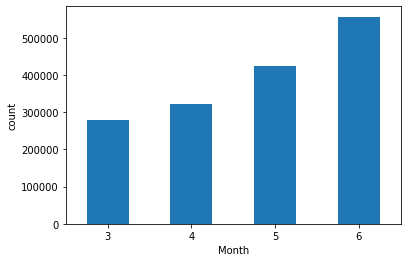

In [86]:
data.Month.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Month',fontsize=10)
plt.ylabel('count',fontsize=10)

In [87]:
data.Month.unique()

array([3, 4, 5, 6])

In [88]:
march = data[data.Month == 3]
april = data[data.Month == 4]
may = data[data.Month == 5]
june = data[data.Month == 6]

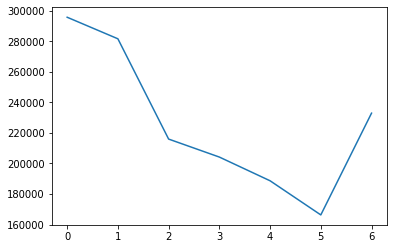

In [89]:
data.요일.value_counts().sort_index().plot() #월화수목금토일

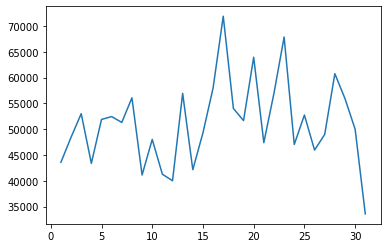

In [90]:
data.Day.value_counts().sort_index().plot()

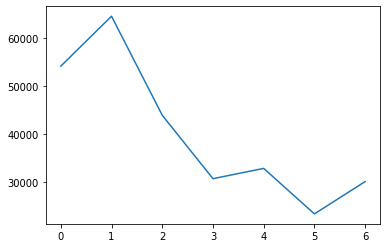

In [91]:
march.요일.value_counts().sort_index().plot()

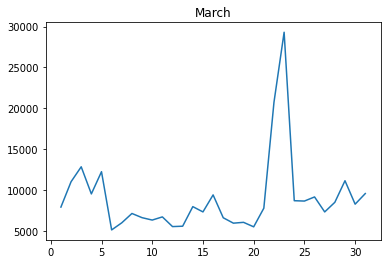

In [92]:
plt.title('March')
march.Day.value_counts().sort_index().plot()

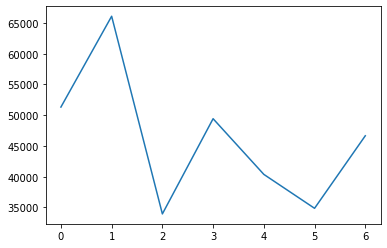

In [93]:
april.요일.value_counts().sort_index().plot()

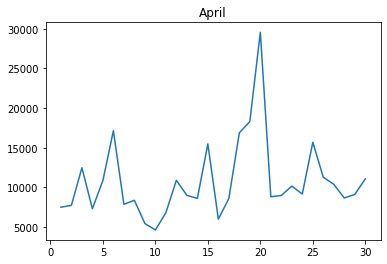

In [94]:
plt.title('April')
april.Day.value_counts().sort_index().plot()

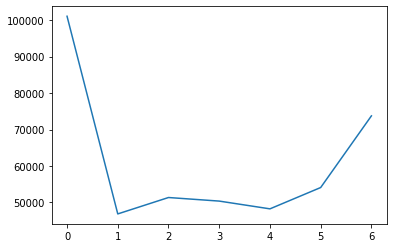

In [95]:
may.요일.value_counts().sort_index().plot()

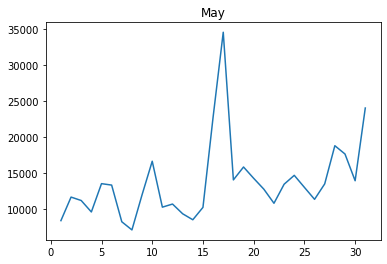

In [96]:
plt.title('May')
may.Day.value_counts().sort_index().plot()

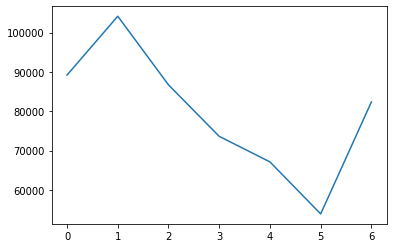

In [97]:
june.요일.value_counts().sort_index().plot()

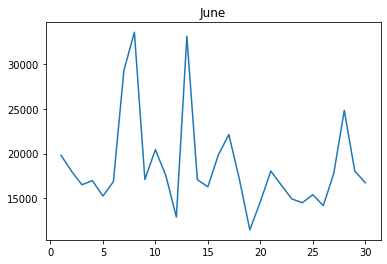

In [98]:
plt.title('June')
june.Day.value_counts().sort_index().plot()

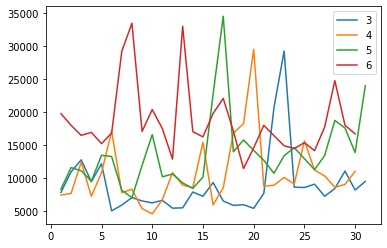

In [99]:
march.Day.value_counts().sort_index().plot(label='3')
april.Day.value_counts().sort_index().plot(label='4')
may.Day.value_counts().sort_index().plot(label='5')
june.Day.value_counts().sort_index().plot(label='6')
plt.legend()

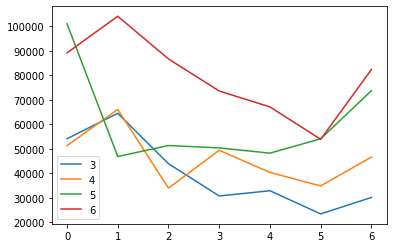

In [100]:
march.요일.value_counts().sort_index().plot(label='3')
april.요일.value_counts().sort_index().plot(label='4')
may.요일.value_counts().sort_index().plot(label='5')
june.요일.value_counts().sort_index().plot(label='6')
plt.legend()

In [101]:
data_group = data.groupby('Month')
data_group['Day'].value_counts()

Month  Day
3      23     29298
       22     20723
       3      12825
       5      12225
       29     11120
              ...  
6      20     14634
       24     14527
       26     14204
       12     12927
       19     11502
Name: Day, Length: 122, dtype: int64

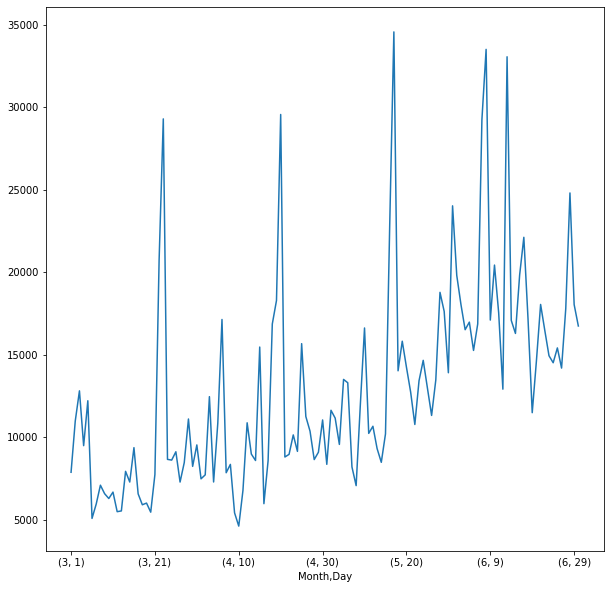

In [102]:
plt.figure(figsize=(10,10))
data.groupby('Month')['Day'].value_counts().sort_index().plot()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

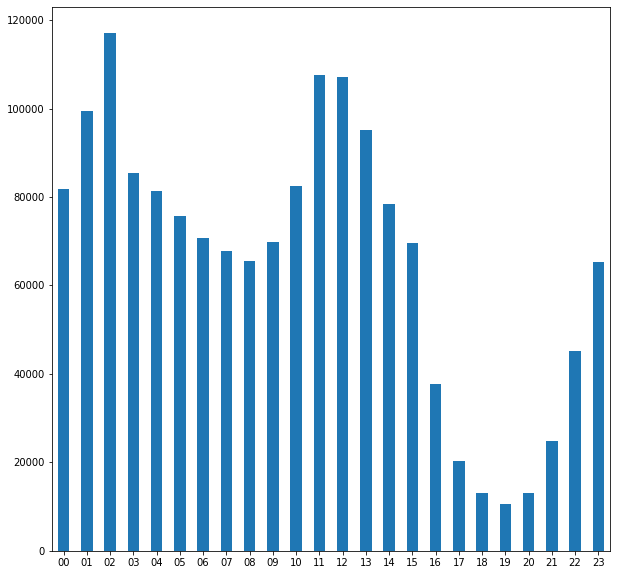

In [103]:
plt.figure(figsize=(10,10))
data.시.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)

Text(0.5, 1.0, 'March')

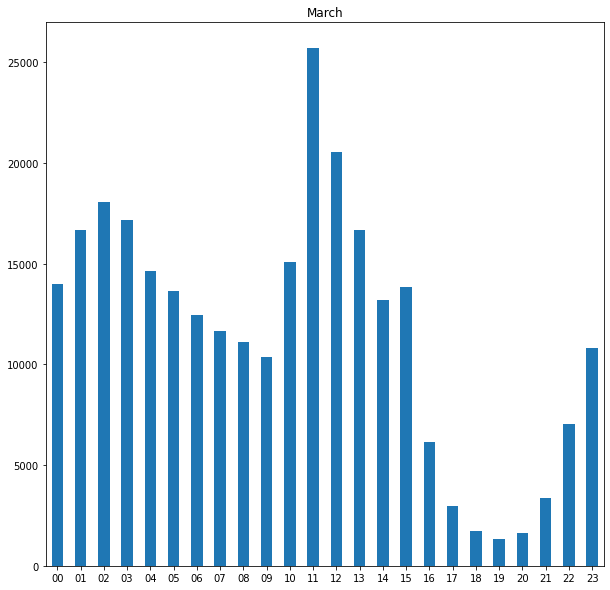

In [104]:

plt.figure(figsize=(10,10))
march.시.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('March')

Text(0.5, 1.0, 'April')

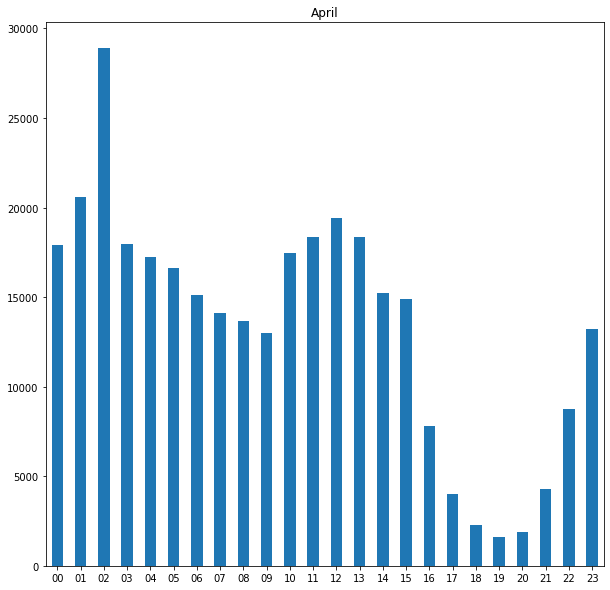

In [105]:
plt.figure(figsize=(10,10))
april.시.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('April')

Text(0.5, 1.0, 'May')

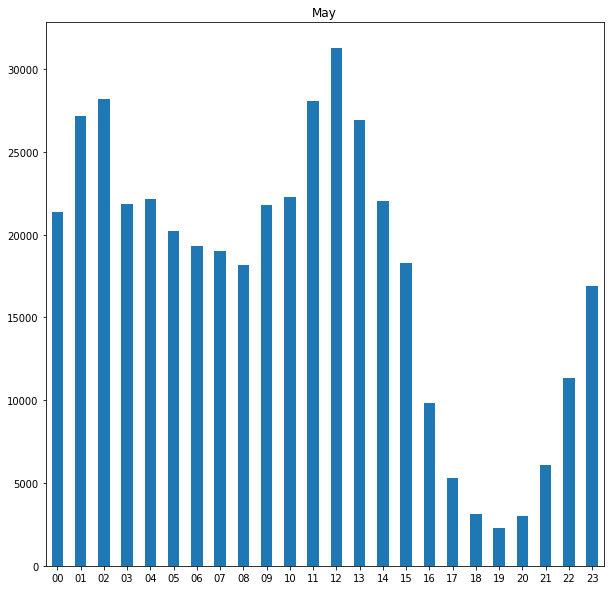

In [106]:
plt.figure(figsize=(10,10))
may.시.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('May')

Text(0.5, 1.0, 'June')

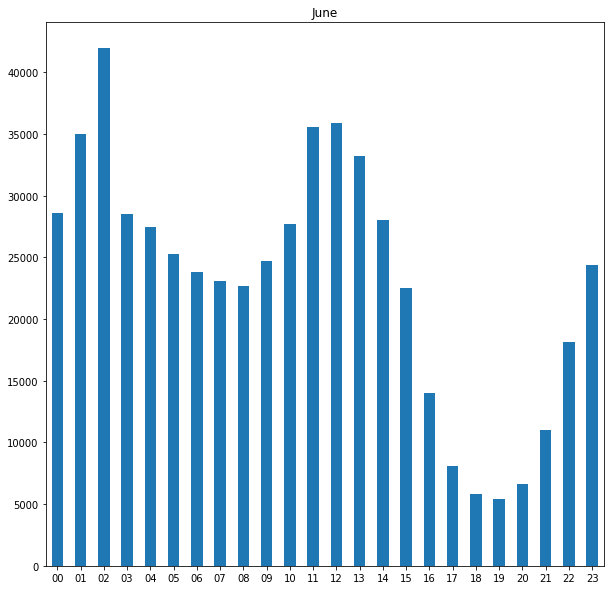

In [107]:
plt.figure(figsize=(10,10))
june.시.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('June')

In [108]:
data[data.시=='13']

,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,INS_TIME,YEAR,Month,Day,초,분,시,요일
1646,2021-03-01,1900-01-01 13:29:45,31800.0,4880838420,2,31800.0,224229,2021,3,1,45,29,13,0
1647,2021-03-01,1900-01-01 13:26:41,109800.0,5059258600_2,2,109800.0,224229,2021,3,1,41,26,13,0
1648,2021-03-01,1900-01-01 13:26:51,35700.0,4704457063,3,35700.0,224229,2021,3,1,51,26,13,0
1649,2021-03-01,1900-01-01 13:26:51,15900.0,4886019132,1,15900.0,224229,2021,3,1,51,26,13,0
1650,2021-03-01,1900-01-01 13:26:55,47700.0,4890221631_2,1,15900.0,224230,2021,3,1,55,26,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585269,2021-06-29,1900-01-01 13:42:09,16300.0,2082242086_043,1,16300.0,134932,2021,6,29,09,42,13,1
1585270,2021-06-29,1900-01-01 13:42:43,17000.0,8809641652379,1,17000.0,134933,2021,6,29,43,42,13,1
1585271,2021-06-29,1900-01-01 13:42:17,267000.0,shop0001552,1,267000.0,134933,2021,6,29,17,42,13,1
1585272,2021-06-29,1900-01-01 13:42:26,34100.0,4255350058,1,34100.0,134933,2021,6,29,26,42,13,1


In [109]:
def time_order(data, month, day, time):
  sum = 0
  if int(time) > 12:
    for i in tqdm(range(len(data))):
      if (int(data.loc[i].Month) == int(month)) & (int(data.loc[i].Day) == int(day)) & (int(data.loc[i].시) < int(time)):
        sum += data.loc[i].ITEM_QTY
  return sum

In [110]:
time_order(data, '03', '01', '13')

  1%|          | 14519/1585447 [00:12<21:57, 1192.38it/s]


KeyboardInterrupt: ignored

In [ ]:
def time_order(data, month, day, time):
  sum = 0
  if int(time) > 12:
    for i in range(len(data)):
      if (int(data.loc[i].Month) == int(month)) & (int(data.loc[i].Day) == int(day)) & (int(data.loc[i].시) < int(time)):
        sum += data.loc[i].ITEM_QTY
  else:
    for i in range(len(data)):
      if (int(data.loc[i].Month) == int(month)) & (int(data.loc[i].Day) == int(day)) & (int(data.loc[i].시) < int(time)):
        sum += data.loc[i].ITEM_QTY
      elif (int(data.loc[i].Month) == int(month)) & (int(data.loc[i].Day) == int(day)-1) & (int(data.loc[i].시) < int(time)):
        sum += data.loc[i].ITEM_QTY

In [145]:
data.BKG_TIME[0]

Timestamp('2021-03-03 03:55:21')

In [144]:
data.BKG_TIME[0] - dt.timedelta(hours=12)

Timestamp('2021-03-02 15:55:21')

In [ ]:
ten_minutes_later = current - datetime.timedelta(minutes=10)